# Проект: Проверка гипотез по увеличению выручки в интернет-магазине. Оценка результата A/B теста.

# Описание проекта

Интернет-магазином для увеличения прибыли подготовлен ряд гипотез. Кроме того проведен А/В тест.
Необходимо, используя данные интернет-магазина, приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами.

# План работ:

## 1. Подготовка к исследованию

**1.1. Загрузка библиотек.**

**1.2. Загрузка данных.**

## 2. Предобработка

**2.1. Поиск дубликатов.**

## 3. Приоритизация гипотез.

**3.1. Приоритизация гипотез через фреймворк ICE.**
    
**3.2. Приоритизация гипотез через фреймворк RICE.**
    
**3.3. сравнение результатов и выбор гипотезы для проверки.**

## 4. Анализ A/B-теста.

**4.1. Кумулятивная выручка по группам.**

**4.2. Кумулятивный средний чек по группам.**

**4.3. Относительное изменение кумулятивного среднего чека группы B к группе A.**
    
**4.4. Кумулятивное среднее количество заказов на посетителя по группам.**
    
**4.5. Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.**
    
**4.6. Количество заказов по пользователям.**
    
**4.7. Определение аномальных пользователей. Подсчет перцентилей.**
    
**4.8. Точечный график стоимостей заказов.**
    
**4.9. Определение аномальных заказов. Подсчет перцентилей.**
    
**4.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**
    
**4.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.**
    
**4.12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**
    
**4.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.**
    
## 5. Решение по результатам теста.

## 1. Подготовка к исследованию

### 1.1. Загрузка библиотек.

In [1]:
# Загружаем необходимые для работы библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

### 1.2. Загрузка данных.

In [2]:
hypothesis, orders, visitors = (
pd.read_csv('C:/Users/79998/Documents/daqw/hypothesis.csv'),  # гипотезы
pd.read_csv('C:/Users/79998/Documents/daqw/orders.csv'),  # заказы
pd.read_csv('C:/Users/79998/Documents/daqw/visitors.csv'),  # пользователи
)

## 2. Предобработка

### 2.1. Поиск дубликатов.

Прежде чем преступать к основной части проекта необходимо изучить данные и выполнить их предобработку. Займемся этим.

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head(3)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [7]:
orders.duplicated().sum()

0

In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [10]:
visitors.duplicated().sum()

0

В данных отсутствуют дубликаты и пропуски. В таблице hypothesis необходимо привести названия колонок к нижнему регистру.

In [11]:
hypothesis.columns = hypothesis.columns.str.lower()

In [12]:
display(hypothesis.head(1))
display(orders.head(1))
display(visitors.head(1))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


,date,group,visitors
0,2019-08-01,A,719


Предобработка выполнена. Приступаем к основной части проекта.

## 3. Приоритизация гипотез.

 ### 3.1. Приоритизация гипотез через фреймворк ICE.

In [13]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

pd.set_option('max_colwidth', 200)

hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### 3.2. Приоритизация гипотез через фреймворк RICE.

In [14]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### 3.3. Cравнение результатов и выбор гипотезы для проверки.

***Вывод:*** При применении RICE вместо ICE изменилась приоритетность гипотез в сторону гипотез, с бОльшим значением показателя reach (охват). Это является следствием формул расчета фреймворков. Соответственно при применении RICE, при прочих равных более приоритетными являются изменения, котороы затронут бОльшее количество пользователей, нежели другие.

Учитывая результаты приоритезации, видится верным протестировать гипотезу под номером 7.

## 4. Анализ A/B-теста.

### 4.1. Кумулятивная выручка по группам.

Ниже мы соберем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и группе Б, после чего построим график кумулятивной выручки по группам.

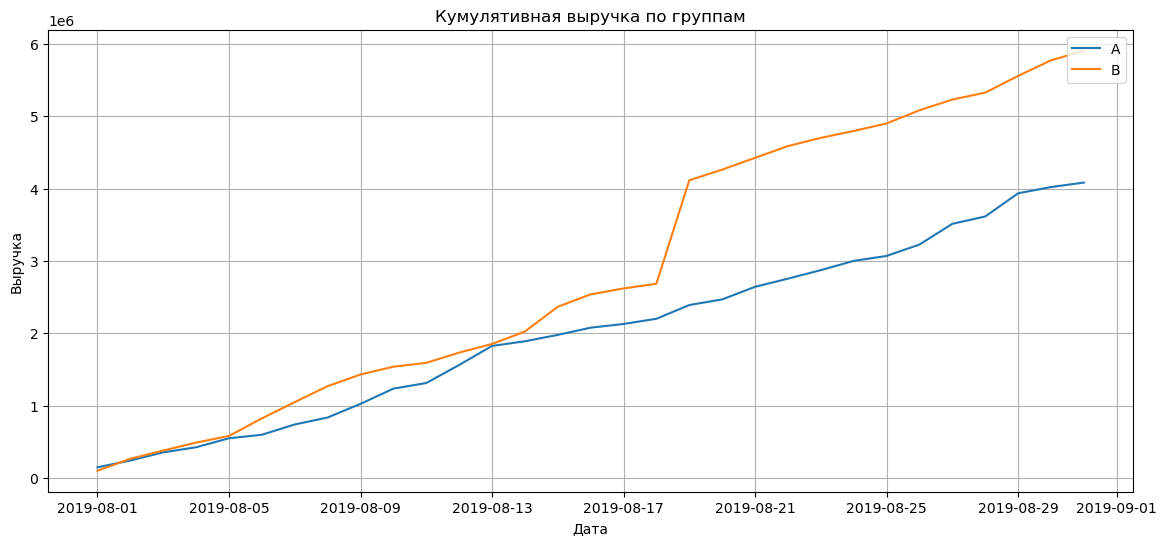

In [15]:
register_matplotlib_converters()

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14, 6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid(True)
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend(loc='upper right')
plt.show()

***Вывод:*** Наблюдаем, что группа B несколько лучше группы А. В начале теста кумулятивная выручка в обоих группах была на одном уровне, однако начиная с второй недели теста группа B плавно выходила вперед. Отмечаем резкий подъем группы B на 18 дне теста, после чего графики в целом шли параллельно друг другу. Даже если предположить, что на 18 дне имелись выбросы, можно утверждать, что группа B в части кумулятивной вырукчки не уступает группе А, а скорее превосходит.

### 4.2. Кумулятивный средний чек по группам.

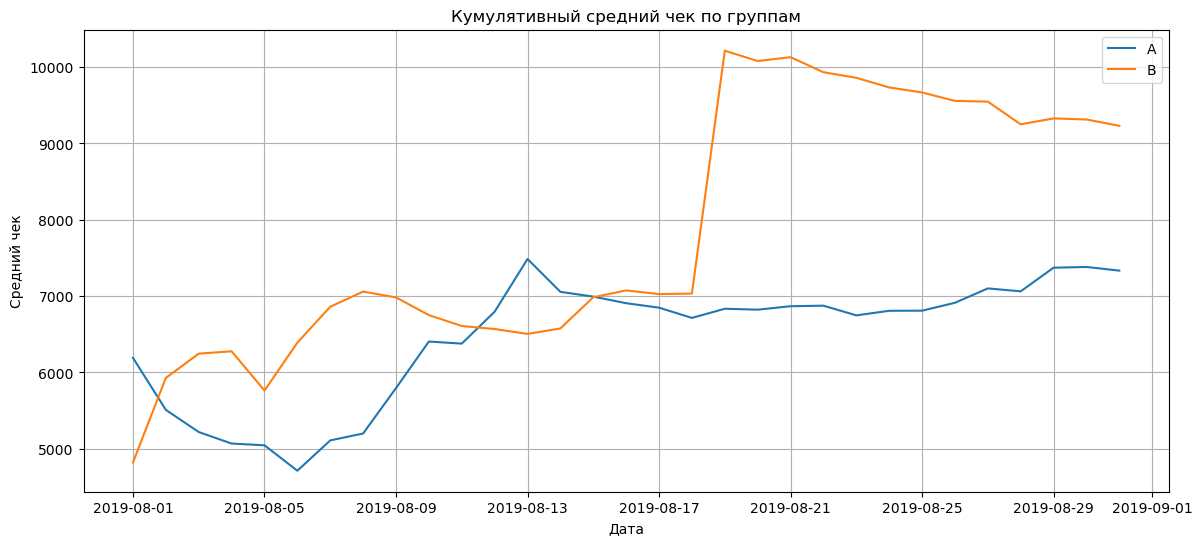

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.grid(True)
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend(loc='upper right')
plt.show()

***Вывод:*** Видим достаточно значительные колебания результатов по накопленному среднему чеку. Также наблюдаем резкий скачок у группы B на 18 дне теста. Сложно сделать однозначный вывод по этому графику. Но как минимум сказать, что группа B уступает группе A точно нельзя.

### 4.3. Относительное изменение кумулятивного среднего чека группы B к группе A.

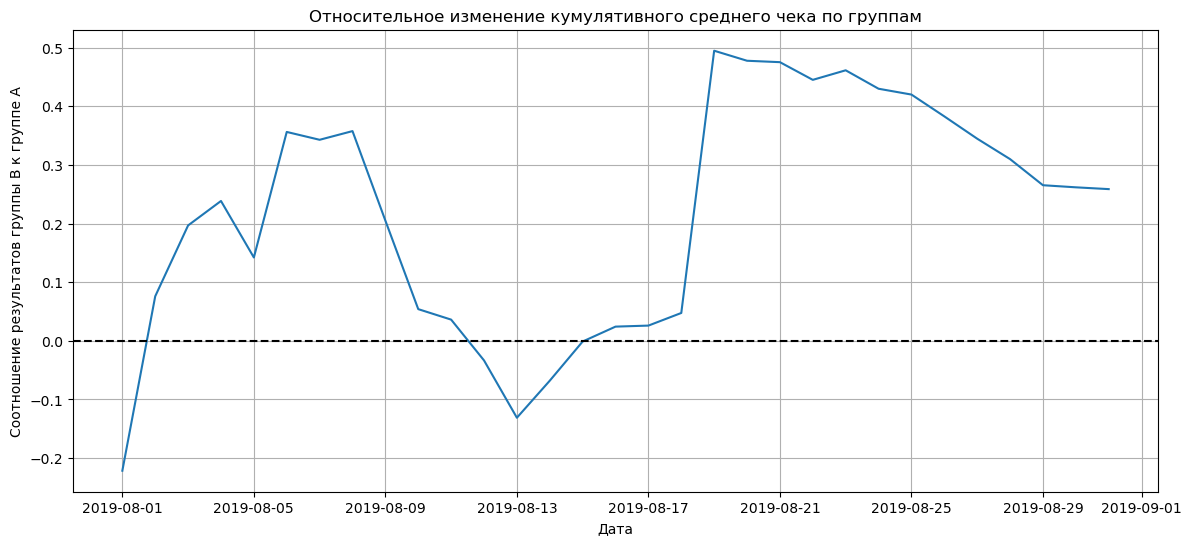

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(14, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(True)
plt.title("Относительное изменение кумулятивного среднего чека по группам")
plt.ylabel("Соотношение результатов группы В к группе А")
plt.xlabel("Дата")
plt.show()

***Вывод:*** По этому графику можно сделать вывод, что группа B лучше группы А.

### 4.4. Кумулятивное среднее количество заказов на посетителя по группам.

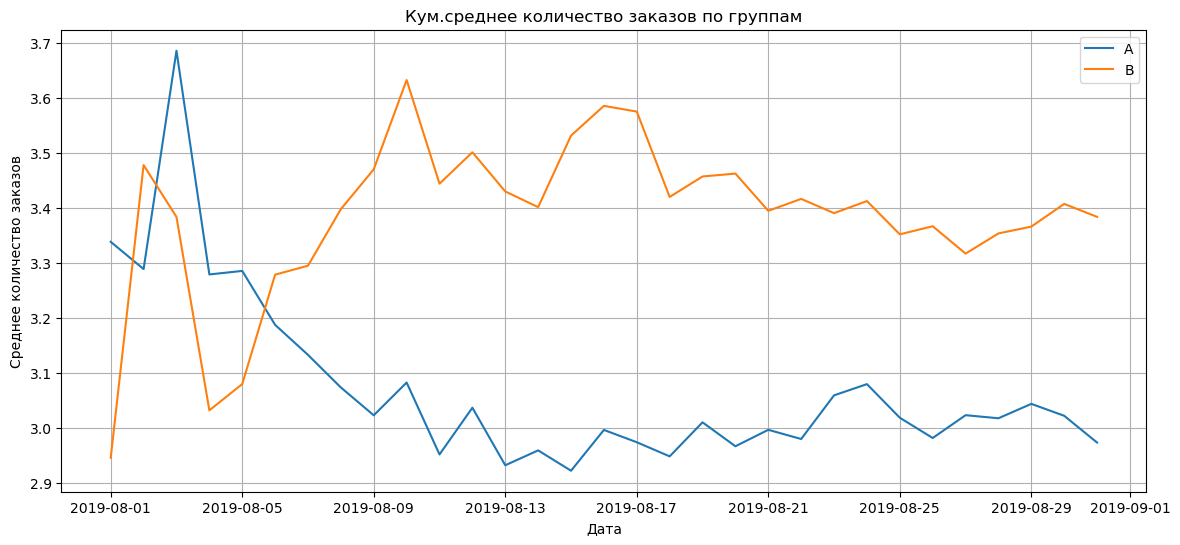

In [18]:
cumulativeData['convers'] = ((cumulativeData['orders']/cumulativeData['visitors'])*100).round (4)


plt.figure(figsize=(14, 6))
cumulativeDataA = cumulativeData [cumulativeData['group']=='A']
cumulativeDataB = cumulativeData [cumulativeData['group']=='B']
plt.plot (cumulativeDataA ['date'], cumulativeDataA ['convers'], label='A')
plt.plot (cumulativeDataB ['date'], cumulativeDataB ['convers'], label='B')
plt.grid(True)
plt.title("Кум.среднее количество заказов по группам")
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов")
plt.legend(loc='upper right')
plt.show()

***Вывод:*** Здесь наблюдаем что группа B значительно лучше группы А в части среднего количества заказов. Стоит отметить, что группа В выигрывает на протяжении всего теста.

### 4.5. Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.

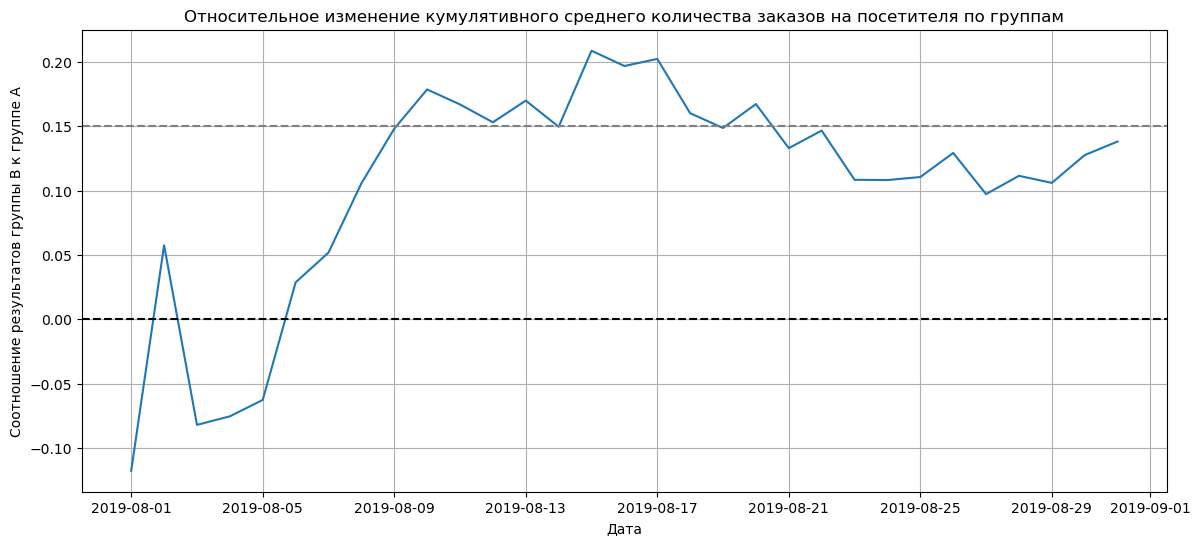

In [19]:
cumulativeConversA = cumulativeData[cumulativeData['group']=='A'][['date','convers']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeConversB = cumulativeData[cumulativeData['group']=='B'][['date','convers']]

mergedCumulativeConvers = cumulativeConversA.merge(cumulativeConversB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение среднего количества заказов
plt.figure(figsize=(14, 6))
plt.plot(mergedCumulativeConvers['date'], (mergedCumulativeConvers['conversB']/mergedCumulativeConvers['conversA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='gray', linestyle='--')

plt.grid(True)
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel("Дата")
plt.ylabel("Соотношение результатов группы В к группе А")
plt.show()

***Вывод:*** График относительного изменения подтверждает наблюдения о том, что в данном показателе группа В лучше группы А.

### 4.6. Количество заказов по пользователям.

In [20]:
# Подсчитаем количество заказов по пользователям

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Видим всего 4 пользователя которые сделали более 5 заказов. Время строить точечный график.

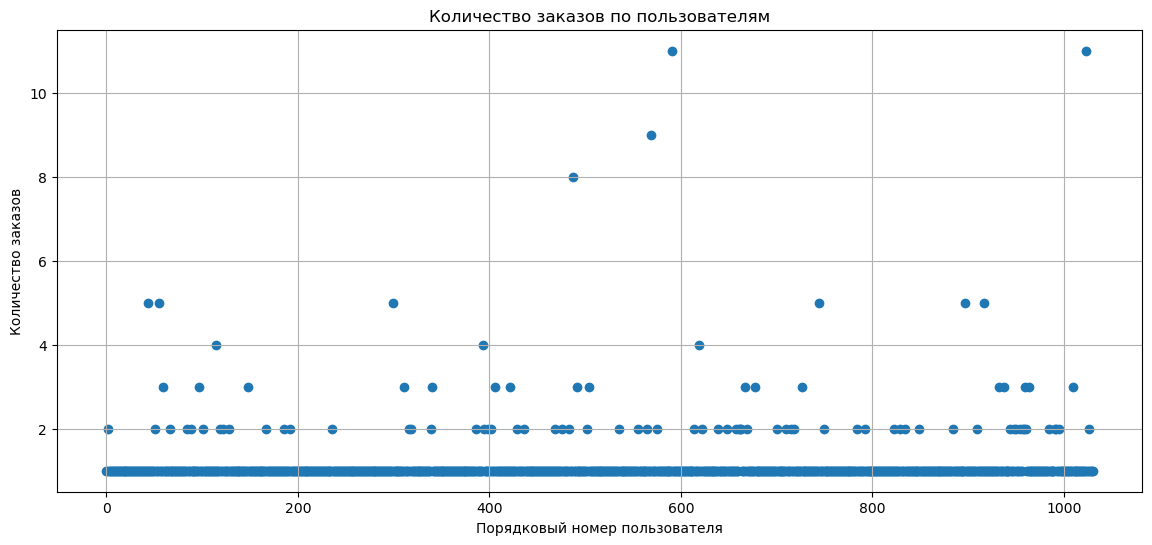

In [21]:
x_values_cnt = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(14, 6))
plt.scatter(x_values_cnt, ordersByUsers['orders'])
plt.grid(True)
plt.title("Количество заказов по пользователям")
plt.xlabel("Порядковый номер пользователя")
plt.ylabel("Количество заказов")
plt.show()
plt.show()

***Вывод:*** Выбросы определенно есть, особенно заметны значения от 4 заказов и более. Необходимо посчитать 95-й и 99-й перцентили, чтобы определиться с границей аномальных значений.

### 4.7. Определение аномальных пользователей. Подсчет перцентилей.

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

***Вывод:*** Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.

Будем считать аномальными пользователей, совершивших более 2 заказов.

### 4.8. Точечный график стоимостей заказов.

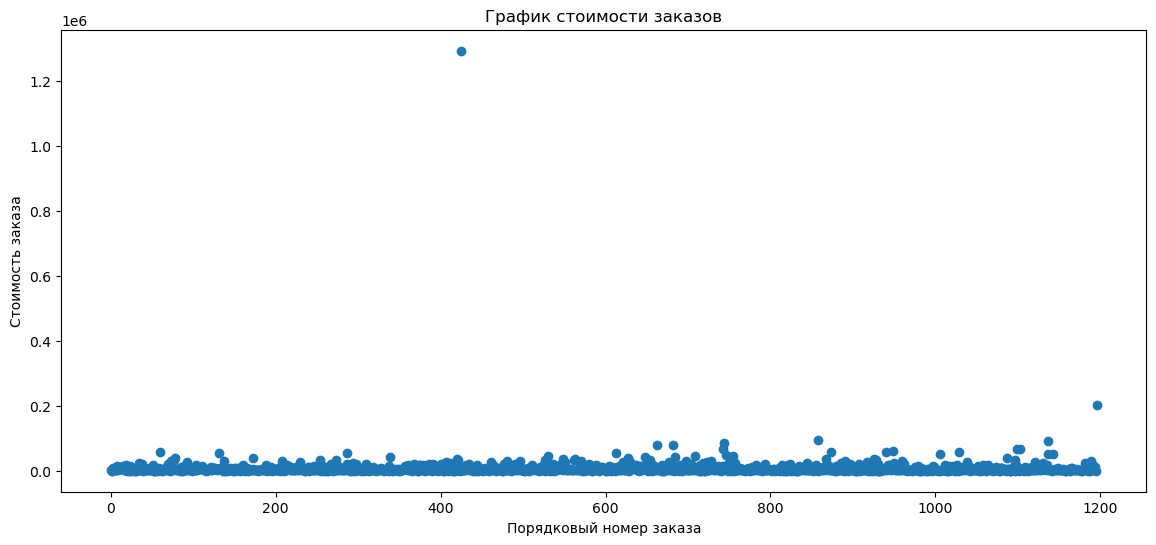

In [23]:
x_values_rev = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(14, 6))
plt.scatter(x_values_rev, orders['revenue'])
plt.title("График стоимости заказов")
plt.xlabel("Порядковый номер заказа")
plt.ylabel("Стоимость заказа")
plt.show()

Видим несколько крупных выбросов. Уменьшим ось Y, чтобы взглянуть на основную часть заказов.

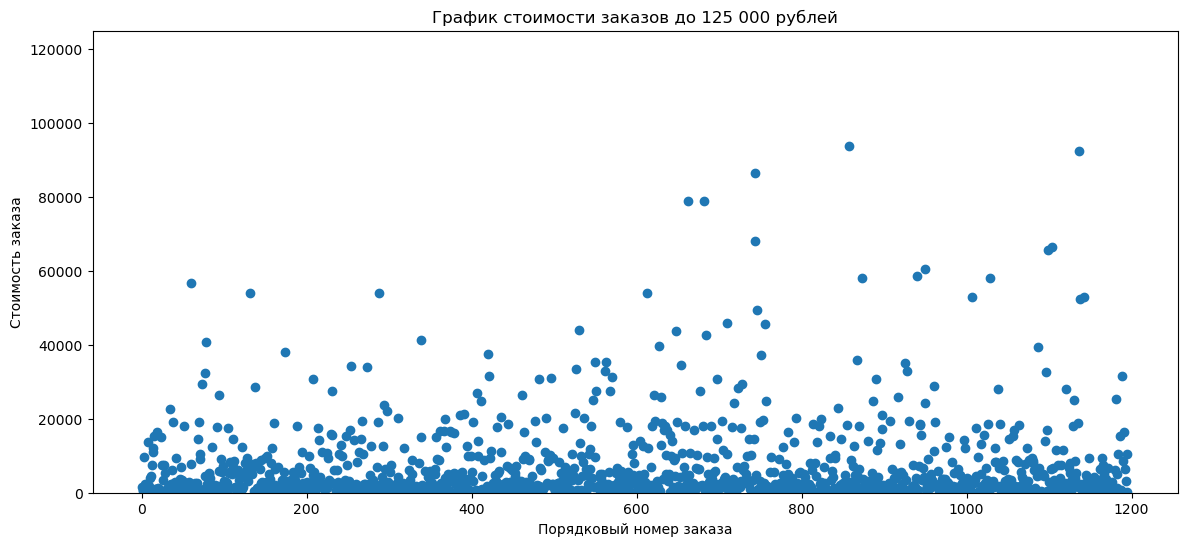

In [24]:
plt.figure(figsize=(14, 6))
plt.scatter(x_values_rev, orders['revenue'])
plt.ylim(0, 125000)
plt.title("График стоимости заказов до 125 000 рублей")
plt.xlabel("Порядковый номер заказа")
plt.ylabel("Стоимость заказа")
plt.show()

***Вывод:*** И здесь наблюдаем выбросы, особенно выделяются 2 заказа. Основная масса заказов лежит в диапазоне до 20 000 рублей. Тут также необходимо посчитать перцентили, прежде чем принимать решение.

### 4.9. Определение аномальных заказов. Подсчет перцентилей.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

***Вывод:*** Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей.

Будем считать аномальными пользователей, чьи заказы были дороже 28 000 рублей.

### 4.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для расчета статистической значимости прежде всего нам необходимо собрать таблицу, в которой будут храниться данные о количестве заказов, суммарной выручке и количестве пользователей по группам в разрезе в и до выбранной даты. Соберем такие данные в таблице data.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Затем необходимо подготовить данные для проверки критерием Манна-Уитни. Данный тест подойдет больше всего, так как мы обнаружили выбросы, которые сильно сдвигают параметрические результаты. В переменные sampleA и sampleB сохраним выборки, где каждый элемент — число заказов определённого пользователя, в том числе ноль.

Сформулируем гипотезы.

****Нулевая гипотеза**** Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет.

****Альтернативная гипотеза**** Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть.

Установим критический уровень статистической значимости в значении 0.05

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(f'p-value: {"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])}')
print(f'Относительный прирост среднего числа заказов группы B: {"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)}')

p-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


***Вывод:*** p-value меньше уровеня статистической значимости, значит отвергаем нулевую гипотезу: статистически значимое различие в среднем количестве заказов между группами есть. Относительный выигрыш группы B равен 13.8%

### 4.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проведем проверку критерием Манна-Уитни в отношении различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы.

****Нулевая гипотеза**** Статистически значимых различий в среднем чеке заказа между группами по "сырым" данным нет.

****Альтернативная гипотеза**** Статистически значимые различия в среднем чеке заказа между группами по "сырым" данным есть.

Установим критический уровень статистической значимости в значении 0.05

In [28]:
# расчитываем p-value
print(f"p-value: {'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])}")

# расчитываем относительный прирост в среднем чеке заказа группы B
print(f"Относительный прирост в среднем чеке заказа группы B: {'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)}")

p-value: 0.729
Относительный прирост в среднем чеке заказа группы B: 0.259


***Вывод:*** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B немного выше среднего чека группы A. На это могли повлиять выбросы. Необходимо провести аналогичную проверку по очищенным данным, исключив аномальных пользователей. Только тогда можно в полной мере оценить результаты А/В теста.

### 4.12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Для начала вычленим аномальных пользователей. Критерии: планка по 95 перцентилю (не более 2 заказов и не дороже 28 000 рублей)

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.shape[0]

74

Выявили 74 аномальных пользователей. Можно приступатьт к проверке, исключив таких пользователей из теста.

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы.

****Нулевая гипотеза**** Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет.

****Альтернативная гипотеза**** Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть.

Установим критический уровень статистической значимости в значении 0.05

In [31]:
print(f'p-value: {"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])}')
print(f'Относительный прирост среднего числа заказов группы B: {"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)}')

p-value: 0.013
Относительный прирост среднего числа заказов группы B: 0.173


***Вывод:*** При анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия. Значит отвергаем нулевую гипотезу: различия в среднем количестве заказов между группами есть. При этом относительный выигрыш группы B увеличился с 13.8% до 17,2 %.

### 4.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы.

****Нулевая гипотеза**** Статистически значимых различий в среднем чеке заказа между группами по "очищенным" данным нет.

****Альтернативная гипотеза**** Статистически значимые различия в среднем чеке заказа между группами по "очищенным" данным есть.

Установим критический уровень статистической значимости в значении 0.05

In [32]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


***Вывод:*** Как и в проверке по сырым данным P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако по очищенным данным средний чек группы B, напротив, стал несколько ниже среднего чека группы A. Очевидно это различие стало следствием избавления от выбросов. В совокупности можно сказать, что между группами А и группами Б нет существенной разницы в среднем чеке заказа.

## 5. Решение по результатам теста.

***Принятое решение:***

Остановить тест, зафиксировать победу группы B.

Несмотря на отсутствие значимых различий в среднем чеке заказа между группами (даже скорее совсем немного худшую позицию группы B), проведенные расчеты, проверки и построенные графики показателей среднего количества заказов и кумулятивной выручки показывают, что группа B лучше группы А. Данных для принятия решения у нас уже достаточно. Нет существенных причин продолжать тест. Фиксируем победу группы В.